In [1]:
import torch 
from torch import nn 
from matplotlib import pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np

Read the CSV FILE

In [2]:
trainset = pd.read_csv('train.csv')
trainset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check if any which attribute / column contains null values

In [3]:
trainset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Exctract only two features/ columns/ attributes for demonstration purpose

In [4]:
df = trainset[['Fare','Sex']]
df.head()

,Fare,Sex
0,7.2500,male
1,71.2833,female
2,7.9250,female
3,53.1000,female
4,8.0500,male


Change the string male / female to 1,0 respectively 

In [5]:
df['Sex'].replace(['female','male'],[0,1],inplace=True)
df.head()

c:\Users\Samba\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Fare,Sex
0,7.2500,1
1,71.2833,0
2,7.9250,0
3,53.1000,0
4,8.0500,1


Scale all the values by multiplying the Fare vector with `1/512` scaler 

In [6]:
df['Fare'] = df['Fare']/512
df.head(10)

C:\Users\Samba\AppData\Local\Temp\ipykernel_14456\1596856497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'] = df['Fare']/512


,Fare,Sex
0,0.014160,1
1,0.139225,0
2,0.015479,0
3,0.103711,0
4,0.015723,1
5,0.016520,1
6,0.101294,1
7,0.041162,1
8,0.021745,0
9,0.058732,0


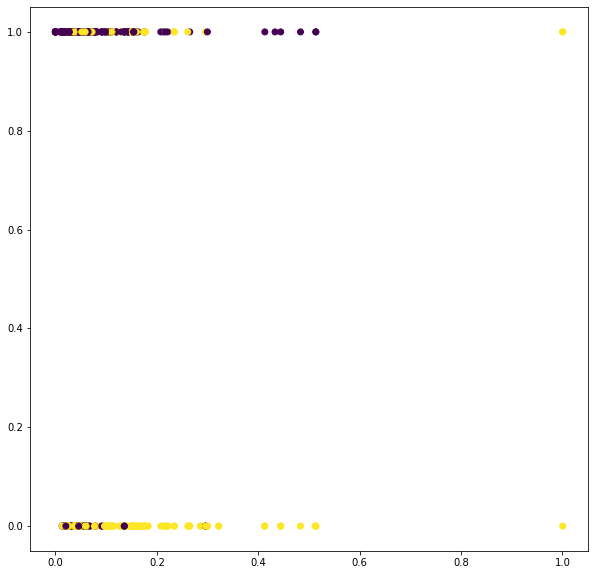

In [7]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df.Fare,df.Sex,c=trainset.Survived)

convert the dataset to numpy then to tensor

In [8]:
numpyx = df.to_numpy()
numpyx = torch.tensor(numpyx[:20],dtype=torch.float32)
numpyx

tensor([[0.0142, 1.0000],
        [0.1392, 0.0000],
        [0.0155, 0.0000],
        [0.1037, 0.0000],
        [0.0157, 1.0000],
        [0.0165, 1.0000],
        [0.1013, 1.0000],
        [0.0412, 1.0000],
        [0.0217, 0.0000],
        [0.0587, 0.0000],
        [0.0326, 0.0000],
        [0.0519, 0.0000],
        [0.0157, 1.0000],
        [0.0611, 1.0000],
        [0.0153, 0.0000],
        [0.0312, 0.0000],
        [0.0569, 1.0000],
        [0.0254, 1.0000],
        [0.0352, 0.0000],
        [0.0141, 0.0000]])

### NN with activation function

In [9]:
class WithSigmoid(nn.Module):
    def __init__(self,infeatures,numclasses) -> None:
        super(WithSigmoid,self).__init__()
        self.nn = nn.Sequential(
            nn.Linear(infeatures,3,bias=False),
            # nn.ReLU(),
            nn.Sigmoid(),
            nn.Linear(3,4,bias=False),
            nn.Sigmoid(),
            # nn.ReLU(),
            nn.Linear(4,numclasses,bias=False)
        )
    
    def forward(self,x):
        return self.nn(x)

yessigmoid = WithSigmoid(2,2)
yessigmoid

WithSigmoid(
  (nn): Sequential(
    (0): Linear(in_features=2, out_features=3, bias=False)
    (1): Sigmoid()
    (2): Linear(in_features=3, out_features=4, bias=False)
    (3): Sigmoid()
    (4): Linear(in_features=4, out_features=2, bias=False)
  )
)

shape of all the weight matrix

In [10]:
for i,p in enumerate(yessigmoid.parameters()):
    print(f'Layer {i} | Shape of the weight: ',p.shape)

Layer 0 | Shape of the weight:  torch.Size([3, 2])
Layer 1 | Shape of the weight:  torch.Size([4, 3])
Layer 2 | Shape of the weight:  torch.Size([2, 4])


### NN WITHOUT activation Layer

In [11]:
class WithoutSigmoid(nn.Module):
    def __init__(self,infeatures,numclasses) -> None:
        super(WithoutSigmoid,self).__init__()
        self.nn = nn.Sequential(
            nn.Linear(infeatures,3,bias=False),
            nn.Linear(3,4,bias=False),
            nn.Linear(4,numclasses,bias=False)
        )
    def forward(self,x):
        return self.nn(x)

nosigmoid = WithoutSigmoid(2,2)
nosigmoid

WithoutSigmoid(
  (nn): Sequential(
    (0): Linear(in_features=2, out_features=3, bias=False)
    (1): Linear(in_features=3, out_features=4, bias=False)
    (2): Linear(in_features=4, out_features=2, bias=False)
  )
)

Shape of all the weight matrices

In [12]:
for i,p in enumerate(nosigmoid.parameters()):
    print(f'Layer {i} | Shape of the weight: ',p.shape)

Layer 0 | Shape of the weight:  torch.Size([3, 2])
Layer 1 | Shape of the weight:  torch.Size([4, 3])
Layer 2 | Shape of the weight:  torch.Size([2, 4])


## Trying to find out the value of 1st data point manually, just using matrix multiplication

In [13]:
o0=torch.matmul(nosigmoid.nn[0].weight,numpyx[0])
print(o0.shape)
o1=torch.matmul(nosigmoid.nn[1].weight,o0)
output=torch.matmul(nosigmoid.nn[2].weight,o1)
output


torch.Size([3])


tensor([-0.1639, -0.0576], grad_fn=<MvBackward0>)

In [14]:
nosig_out = nosigmoid(numpyx) # WITHOUT ACTIVATION FUNCTION
nosig_out

tensor([[-1.6395e-01, -5.7619e-02],
        [ 8.9288e-03, -4.6829e-04],
        [ 9.9267e-04, -5.2062e-05],
        [ 6.6512e-03, -3.4883e-04],
        [-1.6385e-01, -5.7625e-02],
        [-1.6380e-01, -5.7627e-02],
        [-1.5836e-01, -5.7912e-02],
        [-1.6222e-01, -5.7710e-02],
        [ 1.3945e-03, -7.3139e-05],
        [ 3.7666e-03, -1.9755e-04],
        [ 2.0918e-03, -1.0971e-04],
        [ 3.3256e-03, -1.7442e-04],
        [-1.6385e-01, -5.7625e-02],
        [-1.6094e-01, -5.7777e-02],
        [ 9.8380e-04, -5.1597e-05],
        [ 2.0041e-03, -1.0511e-04],
        [-1.6121e-01, -5.7763e-02],
        [-1.6323e-01, -5.7657e-02],
        [ 2.2547e-03, -1.1825e-04],
        [ 9.0499e-04, -4.7464e-05]], grad_fn=<MmBackward0>)

In [15]:
yessig_out = yessigmoid(numpyx) # WITH ACTIVATION FUNCTION
yessig_out

tensor([[-0.1960,  0.3222],
        [-0.1905,  0.3204],
        [-0.1889,  0.3212],
        [-0.1900,  0.3207],
        [-0.1960,  0.3222],
        [-0.1960,  0.3222],
        [-0.1970,  0.3216],
        [-0.1963,  0.3220],
        [-0.1890,  0.3212],
        [-0.1895,  0.3210],
        [-0.1891,  0.3211],
        [-0.1894,  0.3210],
        [-0.1960,  0.3222],
        [-0.1966,  0.3219],
        [-0.1889,  0.3212],
        [-0.1891,  0.3211],
        [-0.1965,  0.3219],
        [-0.1961,  0.3221],
        [-0.1892,  0.3211],
        [-0.1889,  0.3212]], grad_fn=<MmBackward0>)

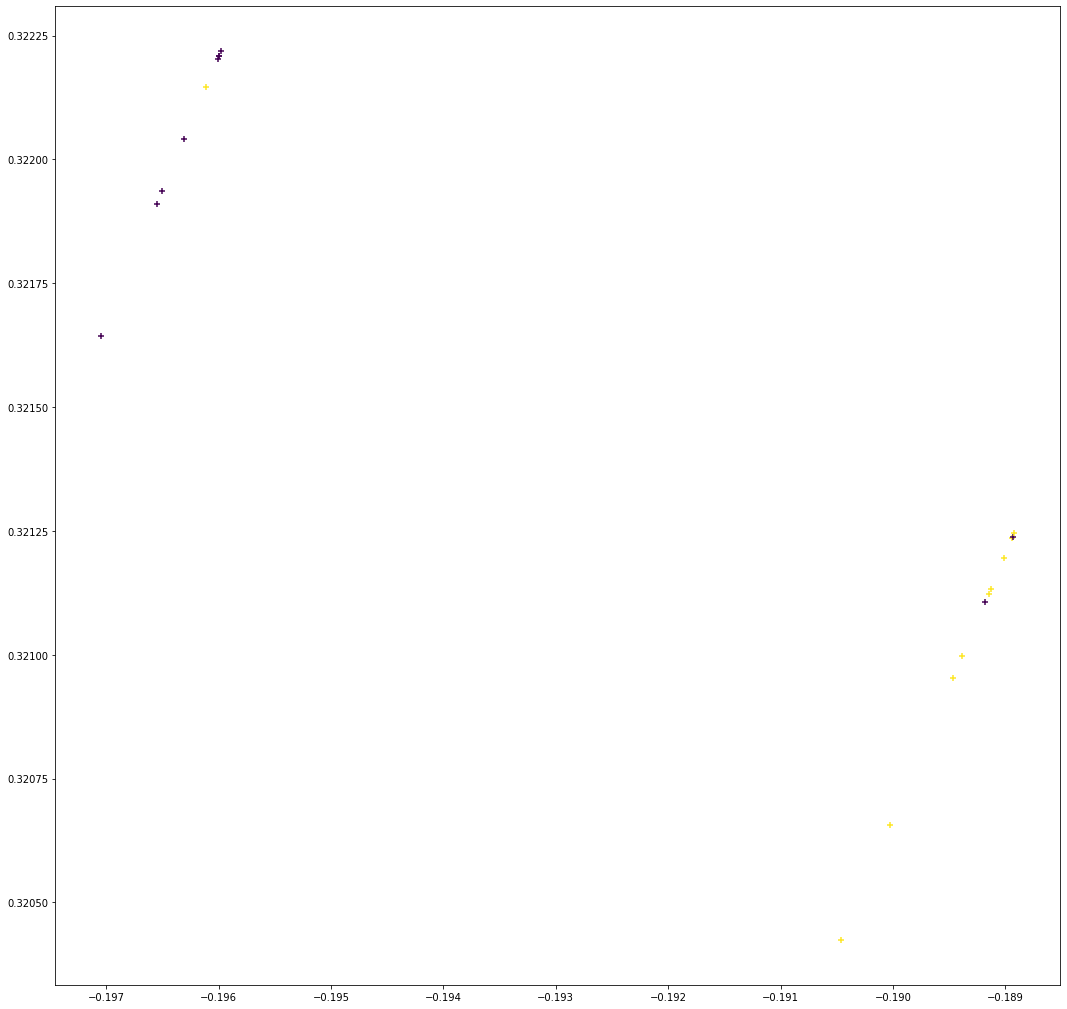

In [16]:
fig = plt.figure(figsize=(18,18))
# plt.scatter(nosig_out[:,0].detach().numpy(),nosig_out[:,1].detach().numpy(),c=trainset.Survived[:20]) #without activations
# plt.scatter(numpyx[:,0].numpy(),numpyx[:,1].numpy(),c=trainset.Survived[:20],marker='*') # original
plt.scatter(yessig_out[:,0].detach().numpy(),yessig_out[:,1].detach().numpy(),c=trainset.Survived[:20],marker='+') # with activations


In [17]:
targets = torch.tensor(trainset.Survived,dtype=torch.long)

In [18]:
LOSS = nn.CrossEntropyLoss()
yesoptim = torch.optim.Adam(yessigmoid.parameters(),lr=0.01)
nooptim = torch.optim.Adam(nosigmoid.parameters(),lr=0.01)

In [19]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self) -> None:
        self.data = numpyx
        self.targets = targets
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
         return self.data[index],self.targets[index]


In [20]:
dset = Dataset()
trainloader = torch.utils.data.DataLoader(dset,batch_size=16,shuffle=True)

In [21]:
from tqdm.notebook import tqdm 

def training(trainloader,model1,model2,lossfn,optim1,optim2,epoch):
    LEN= len(trainloader)
    def nosigtrain(trainloader,model1,lossfn,optim1):
        totalloss = 0
        for x,y in trainloader:
            # print(x,y)
            optim1.zero_grad()
            yhat = model1(x)
            # print(yhat)
            # break
            batchloss = lossfn(yhat,y)
            totalloss+=batchloss.item()
            batchloss.backward()
            optim1.step()
        return totalloss/LEN

    def sigtrain(trainloader,model2,lossfn,optim2):
        totalloss=0
        for x,y in trainloader:
            optim2.zero_grad()
            yhat = model2(x)
            batchloss = lossfn(yhat,y)
            totalloss+=batchloss.item()
            batchloss.backward()
            optim2.step()
        return totalloss/LEN
    
    nosigLOSS = list()
    sigLOSS = list()
    for e in tqdm(range(epoch)):
        # print(f'Epoch {e+1}/{epoch}')
        nosigLOSS.append(nosigtrain(trainloader,model1,lossfn,optim1))
        sigLOSS.append(sigtrain(trainloader,model2,lossfn,optim2))
    
    plt.plot(range(epoch),sigLOSS,label='WITH activations')
    plt.plot(range(epoch),nosigLOSS,color='r',label='WITHOUT activations')
    plt.legend()
    plt.show()





  0%|          | 0/100 [00:00<?, ?it/s]

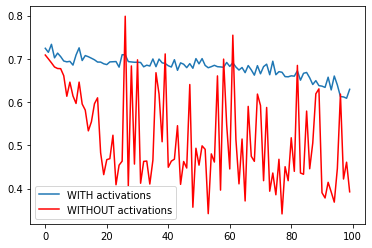

In [22]:
training(trainloader,nosigmoid,yessigmoid,LOSS,nooptim,yesoptim,100)

In [23]:
a = yessigmoid(numpyx)
b = nosigmoid(numpyx)

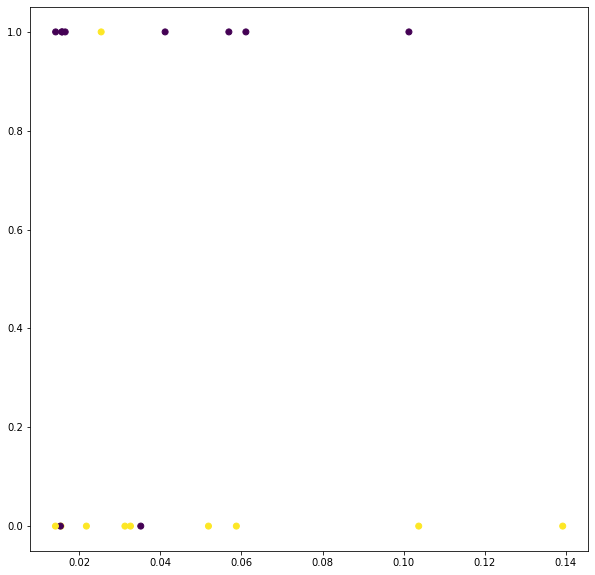

In [24]:
fig = plt.figure(figsize=(10,10))
# plt.scatter(b[:,0].detach().numpy(),b[:,1].detach().numpy(),c=trainset.Survived[:20],cmap='winter') # without Activations
# plt.scatter(a[:,0].detach().numpy(),a[:,1].detach().numpy(),c=trainset.Survived[:20],cmap='cool',marker='+') # WITH ACTIVATIONS
plt.scatter(numpyx[:,0].numpy(),numpyx[:,1].numpy(),c=trainset.Survived[:20]) # original

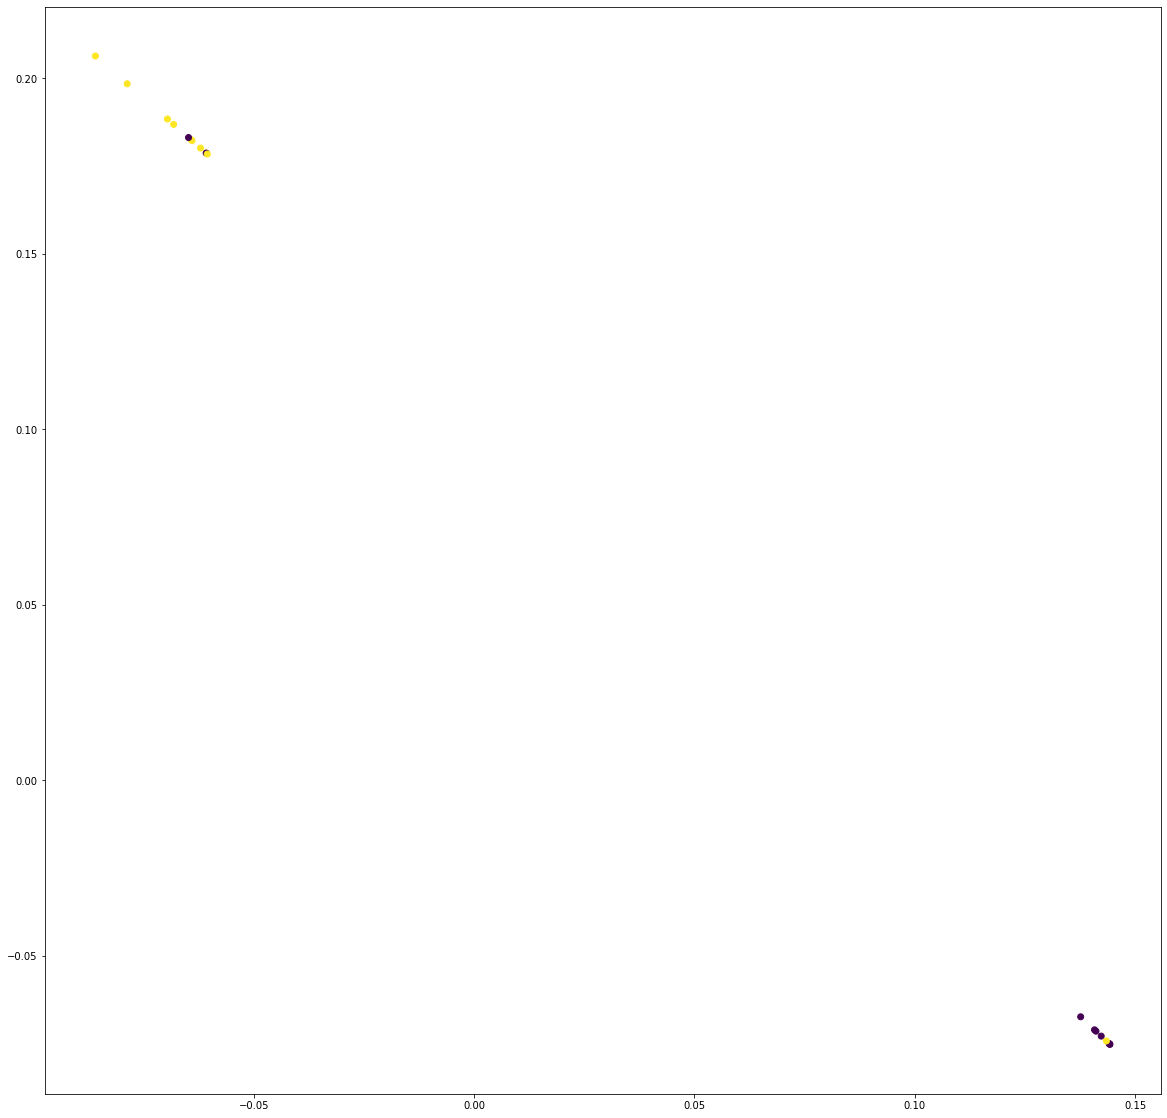

In [28]:
fig = plt.figure(figsize=(20,20))
plt.scatter(a[:,0].detach().numpy(),a[:,1].detach().numpy(),c=trainset.Survived[:20]) # WITH ACTIVATIONS

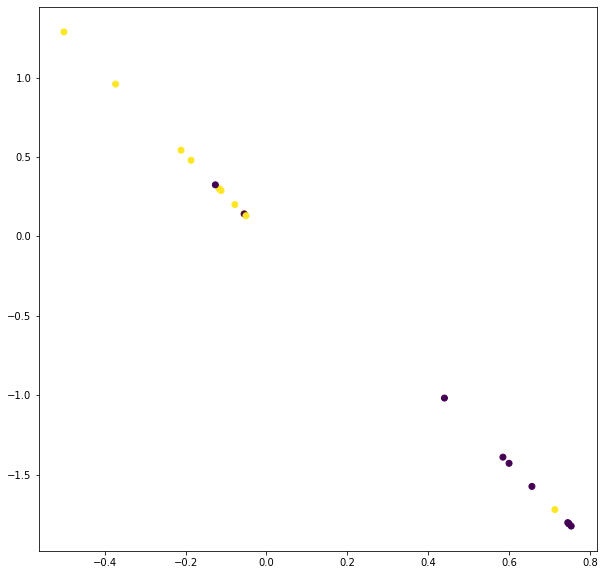

In [27]:
fig = plt.figure(figsize=(10,10))
plt.scatter(b[:,0].detach().numpy(),b[:,1].detach().numpy(),c=trainset.Survived[:20]) # without Activations